In [98]:
import torch
import matplotlib.pyplot as plt
import tqdm
import utils
import dataloaders
import torchvision
from trainer import Trainer

### Model Definition

In [99]:
torch.random.manual_seed(0)

class FullyConnectedModel(torch.nn.Module):

    def __init__(self):
        super().__init__()
        # We are using 28x28 greyscale images.
        num_input_nodes = 28*28
        # Number of classes in the MNIST dataset
        num_classes = 10

        # Define our model
        self.classifier = torch.nn.Sequential(
            torch.nn.Linear(num_input_nodes, num_classes),
        )
    
    def forward(self, x):
        # Runs a forward pass on the images
        x = x.view(-1, 28*28)
        out = self.classifier(x)
        return out

In [100]:
class NormyModel(torch.nn.Module):

    def __init__(self):
        super().__init__()
        # We are using 28x28 greyscale images.
        num_input_nodes = 28*28
        # Number of classes in the MNIST dataset
        num_classes = 10

        # Define our model
        self.classifier = torch.nn.Sequential(
            torch.nn.Linear(num_input_nodes, 64),
            torch.nn.ReLU(),
            torch.nn.Linear(64, 64),            
            torch.nn.ReLU(),
            torch.nn.Linear(64, 64),            
            torch.nn.ReLU(),
            torch.nn.Linear(64, num_classes)            
        )
    
    def forward(self, x):
        # Runs a forward pass on the images
        x = x.view(-1, 28*28)
        out = self.classifier(x)
        return out

### Hyperparameters & Loss function

In [101]:
# Hyperparameters
batch_size = 64
learning_rate = .0192
num_epochs = 5


# Use CrossEntropyLoss for multi-class classification
loss_function = torch.nn.CrossEntropyLoss()

# Model definition
model = FullyConnectedModel()
modelNormy = NormyModel()

# Define optimizer (Stochastic Gradient Descent)
optimizer = torch.optim.SGD(model.parameters(),
                            lr=learning_rate)

optimizerNormy = torch.optim.SGD(modelNormy.parameters(),
                            lr=learning_rate)

image_transform = torchvision.transforms.Compose([
  torchvision.transforms.ToTensor(),
  torchvision.transforms.Normalize((0.5,),(0.25,))
])

image_transform_normy = torchvision.transforms.Compose([
  torchvision.transforms.ToTensor(),
  torchvision.transforms.Normalize((0.5,),(0.25,))
])


dataloader_train, dataloader_val = dataloaders.load_dataset(
    batch_size, 
    image_transform=image_transform
)

dataloader_train_normy, dataloader_val_normy = dataloaders.load_dataset(
    batch_size, 
    image_transform=image_transform_normy
)

### Train model

In [102]:

trainer = Trainer(
  model=model,
  dataloader_train=dataloader_train,
  dataloader_val=dataloader_val,
  batch_size=batch_size,
  loss_function=loss_function,
  optimizer=optimizer
)

#train_loss_dict, val_loss_dict = trainer.train(num_epochs)

trainerNormy = Trainer(
  model=modelNormy,
  dataloader_train=dataloader_train_normy,
  dataloader_val=dataloader_val_normy,
  batch_size=batch_size,
  loss_function=loss_function,
  optimizer=optimizerNormy
)

train_loss_dict_normy, val_loss_dict_normy = trainerNormy.train(num_epochs)







Training epoch 0:   0%|          | 0/938 [00:00<?, ?it/s]





Training epoch 0:   0%|          | 2/938 [00:00<01:14, 12.64it/s]





Training epoch 0:   0%|          | 4/938 [00:00<01:11, 13.12it/s]





Training epoch 0:   1%|          | 6/938 [00:00<01:08, 13.58it/s]





Training epoch 0:   1%|          | 8/938 [00:00<01:04, 14.45it/s]





Training epoch 0:   1%|          | 10/938 [00:00<01:04, 14.47it/s]





Training epoch 0:   1%|▏         | 12/938 [00:00<01:05, 14.14it/s]





Training epoch 0:   1%|▏         | 14/938 [00:00<01:03, 14.58it/s]





Training epoch 0:   2%|▏         | 16/938 [00:01<00:59, 15.38it/s]





Training epoch 0:   2%|▏         | 18/938 [00:01<00:59, 15.54it/s]





Training epoch 0:   2%|▏         | 20/938 [00:01<00:58, 15.76it/s]





Training epoch 0:   2%|▏         | 22/938 [00:01<01:06, 13.83it/s]





Training epoch 0:   3%|▎         | 24/938 [00:01<01:15, 12.17it/s]





Training epoch 0:   3%|▎         | 26/938 [00:01<01:19, 11.53it/s]






Training epoch 0:  20%|██        | 189/938 [00:12<00:46, 16.23it/s]





Training epoch 0:  20%|██        | 191/938 [00:12<00:52, 14.20it/s]





Training epoch 0:  21%|██        | 193/938 [00:12<00:49, 15.13it/s]





Training epoch 0:  21%|██        | 195/938 [00:12<00:46, 15.92it/s]





Training epoch 0:  21%|██        | 197/938 [00:12<00:43, 16.90it/s]





Training epoch 0:  21%|██        | 199/938 [00:12<00:43, 16.97it/s]





Training epoch 0:  21%|██▏       | 201/938 [00:12<00:46, 15.87it/s]





Training epoch 0:  22%|██▏       | 203/938 [00:13<00:48, 15.06it/s]





Training epoch 0:  22%|██▏       | 205/938 [00:13<00:47, 15.45it/s]





Training epoch 0:  22%|██▏       | 207/938 [00:13<00:45, 16.10it/s]





Training epoch 0:  22%|██▏       | 209/938 [00:13<00:45, 16.10it/s]





Training epoch 0:  22%|██▏       | 211/938 [00:13<00:48, 15.12it/s]





Training epoch 0:  23%|██▎       | 213/938 [00:13<00:48, 14.98it/s]





Training epoch 0:  23%|██▎       | 215/938 [00:13<0

Training epoch 0:  40%|████      | 379/938 [00:23<00:32, 17.36it/s]





Training epoch 0:  41%|████      | 381/938 [00:23<00:31, 17.89it/s]





Training epoch 0:  41%|████      | 383/938 [00:23<00:30, 18.04it/s]





Training epoch 0:  41%|████      | 386/938 [00:23<00:28, 19.39it/s]





Training epoch 0:  41%|████▏     | 389/938 [00:23<00:28, 19.34it/s]





Training epoch 0:  42%|████▏     | 391/938 [00:23<00:30, 18.10it/s]





Training epoch 0:  42%|████▏     | 393/938 [00:24<00:29, 18.23it/s]





Training epoch 0:  42%|████▏     | 395/938 [00:24<00:29, 18.68it/s]





Training epoch 0:  42%|████▏     | 398/938 [00:24<00:27, 19.59it/s]





Training epoch 0:  43%|████▎     | 400/938 [00:24<00:28, 19.02it/s]





Training epoch 0:  43%|████▎     | 403/938 [00:24<00:26, 20.07it/s]





Training epoch 0:  43%|████▎     | 406/938 [00:24<00:25, 20.64it/s]





Training epoch 0:  44%|████▎     | 409/938 [00:24<00:26, 19.65it/s]





Training epoch 0:  44%|████▍     | 411/938 [00:24<0

Training epoch 0:  67%|██████▋   | 629/938 [00:35<00:14, 20.61it/s]





Training epoch 0:  67%|██████▋   | 632/938 [00:35<00:14, 20.67it/s]





Training epoch 0:  68%|██████▊   | 635/938 [00:35<00:15, 20.05it/s]





Training epoch 0:  68%|██████▊   | 638/938 [00:36<00:14, 20.69it/s]





Training epoch 0:  68%|██████▊   | 641/938 [00:36<00:14, 21.15it/s]





Training epoch 0:  69%|██████▊   | 644/938 [00:36<00:14, 20.55it/s]





Training epoch 0:  69%|██████▉   | 647/938 [00:36<00:14, 20.53it/s]





Training epoch 0:  69%|██████▉   | 650/938 [00:36<00:14, 20.43it/s]





Training epoch 0:  70%|██████▉   | 653/938 [00:36<00:14, 19.98it/s]





Training epoch 0:  70%|██████▉   | 656/938 [00:36<00:13, 20.72it/s]





Training epoch 0:  70%|███████   | 659/938 [00:37<00:13, 20.99it/s]





Training epoch 0:  71%|███████   | 662/938 [00:37<00:13, 20.83it/s]





Training epoch 0:  71%|███████   | 665/938 [00:37<00:12, 21.20it/s]





Training epoch 0:  71%|███████   | 668/938 [00:37<0

Training epoch 0:  93%|█████████▎| 873/938 [00:48<00:03, 17.95it/s]





Training epoch 0:  93%|█████████▎| 876/938 [00:48<00:03, 19.37it/s]





Training epoch 0:  94%|█████████▎| 878/938 [00:48<00:04, 14.67it/s]





Training epoch 0:  94%|█████████▍| 880/938 [00:48<00:03, 15.16it/s]





Training epoch 0:  94%|█████████▍| 882/938 [00:48<00:03, 15.29it/s]





Training epoch 0:  94%|█████████▍| 884/938 [00:48<00:03, 15.74it/s]





Training epoch 0:  94%|█████████▍| 886/938 [00:48<00:03, 16.65it/s]





Training epoch 0:  95%|█████████▍| 888/938 [00:48<00:02, 17.30it/s]





Training epoch 0:  95%|█████████▍| 891/938 [00:49<00:02, 18.64it/s]





Training epoch 0:  95%|█████████▌| 894/938 [00:49<00:02, 19.70it/s]





Training epoch 0:  96%|█████████▌| 897/938 [00:49<00:01, 20.54it/s]





Training epoch 0:  96%|█████████▌| 900/938 [00:49<00:01, 20.42it/s]





Training epoch 0:  96%|█████████▋| 903/938 [00:49<00:01, 20.91it/s]





Training epoch 0:  97%|█████████▋| 906/938 [00:49<0

Training epoch 1:  14%|█▍        | 134/938 [00:10<00:56, 14.15it/s]





Training epoch 1:  14%|█▍        | 136/938 [00:10<00:54, 14.78it/s]





Training epoch 1:  15%|█▍        | 138/938 [00:10<00:55, 14.51it/s]





Training epoch 1:  15%|█▍        | 140/938 [00:10<00:54, 14.75it/s]





Training epoch 1:  15%|█▌        | 142/938 [00:11<00:51, 15.53it/s]





Training epoch 1:  15%|█▌        | 144/938 [00:11<00:57, 13.90it/s]





Training epoch 1:  16%|█▌        | 146/938 [00:11<01:08, 11.64it/s]





Training epoch 1:  16%|█▌        | 148/938 [00:11<01:24,  9.38it/s]





Training epoch 1:  16%|█▌        | 150/938 [00:12<01:22,  9.59it/s]





Training epoch 1:  16%|█▌        | 152/938 [00:12<01:21,  9.70it/s]





Training epoch 1:  16%|█▋        | 154/938 [00:12<01:13, 10.63it/s]





Training epoch 1:  17%|█▋        | 156/938 [00:12<01:13, 10.65it/s]





Training epoch 1:  17%|█▋        | 158/938 [00:12<01:31,  8.52it/s]





Training epoch 1:  17%|█▋        | 159/938 [00:13<0

Training epoch 1:  34%|███▍      | 317/938 [00:23<00:36, 17.15it/s]





Training epoch 1:  34%|███▍      | 319/938 [00:23<00:37, 16.43it/s]





Training epoch 1:  34%|███▍      | 321/938 [00:23<00:35, 17.35it/s]





Training epoch 1:  34%|███▍      | 323/938 [00:23<00:34, 17.58it/s]





Training epoch 1:  35%|███▍      | 325/938 [00:23<00:34, 17.65it/s]





Training epoch 1:  35%|███▍      | 327/938 [00:23<00:34, 17.80it/s]





Training epoch 1:  35%|███▌      | 329/938 [00:23<00:34, 17.70it/s]





Training epoch 1:  35%|███▌      | 331/938 [00:24<00:35, 17.22it/s]





Training epoch 1:  36%|███▌      | 333/938 [00:24<00:34, 17.49it/s]





Training epoch 1:  36%|███▌      | 335/938 [00:24<00:39, 15.25it/s]





Training epoch 1:  36%|███▌      | 337/938 [00:24<00:41, 14.56it/s]





Training epoch 1:  36%|███▌      | 339/938 [00:24<00:42, 14.23it/s]





Training epoch 1:  36%|███▋      | 341/938 [00:24<00:42, 13.94it/s]





Training epoch 1:  37%|███▋      | 343/938 [00:24<0

Training epoch 1:  53%|█████▎    | 501/938 [00:35<00:27, 15.90it/s]





Training epoch 1:  54%|█████▎    | 503/938 [00:35<00:26, 16.49it/s]





Training epoch 1:  54%|█████▍    | 505/938 [00:35<00:25, 17.20it/s]





Training epoch 1:  54%|█████▍    | 507/938 [00:35<00:24, 17.29it/s]





Training epoch 1:  54%|█████▍    | 509/938 [00:35<00:25, 17.10it/s]





Training epoch 1:  54%|█████▍    | 511/938 [00:36<00:28, 14.85it/s]





Training epoch 1:  55%|█████▍    | 513/938 [00:36<00:28, 14.71it/s]





Training epoch 1:  55%|█████▍    | 515/938 [00:36<00:27, 15.17it/s]





Training epoch 1:  55%|█████▌    | 517/938 [00:36<00:26, 15.79it/s]





Training epoch 1:  55%|█████▌    | 519/938 [00:36<00:24, 16.85it/s]





Training epoch 1:  56%|█████▌    | 521/938 [00:36<00:25, 16.57it/s]





Training epoch 1:  56%|█████▌    | 523/938 [00:36<00:24, 16.77it/s]





Training epoch 1:  56%|█████▌    | 525/938 [00:36<00:25, 16.18it/s]





Training epoch 1:  56%|█████▌    | 527/938 [00:37<0

Training epoch 1:  71%|███████   | 667/938 [00:47<00:15, 17.58it/s]





Training epoch 1:  71%|███████▏  | 669/938 [00:47<00:15, 17.04it/s]





Training epoch 1:  72%|███████▏  | 671/938 [00:48<00:16, 16.38it/s]





Training epoch 1:  72%|███████▏  | 673/938 [00:48<00:16, 16.43it/s]





Training epoch 1:  72%|███████▏  | 675/938 [00:48<00:15, 16.85it/s]





Training epoch 1:  72%|███████▏  | 677/938 [00:48<00:15, 17.38it/s]





Training epoch 1:  72%|███████▏  | 679/938 [00:48<00:14, 17.71it/s]





Training epoch 1:  73%|███████▎  | 681/938 [00:48<00:14, 17.96it/s]





Training epoch 1:  73%|███████▎  | 683/938 [00:48<00:14, 17.97it/s]





Training epoch 1:  73%|███████▎  | 685/938 [00:48<00:14, 17.67it/s]





Training epoch 1:  73%|███████▎  | 687/938 [00:48<00:14, 16.74it/s]





Training epoch 1:  73%|███████▎  | 689/938 [00:49<00:15, 15.57it/s]





Training epoch 1:  74%|███████▎  | 691/938 [00:49<00:15, 15.85it/s]





Training epoch 1:  74%|███████▍  | 693/938 [00:49<0

Training epoch 1:  91%|█████████ | 853/938 [00:59<00:07, 10.81it/s]





Training epoch 1:  91%|█████████ | 855/938 [00:59<00:06, 12.25it/s]





Training epoch 1:  91%|█████████▏| 857/938 [00:59<00:06, 13.31it/s]





Training epoch 1:  92%|█████████▏| 859/938 [00:59<00:05, 13.47it/s]





Training epoch 1:  92%|█████████▏| 861/938 [00:59<00:05, 14.46it/s]





Training epoch 1:  92%|█████████▏| 863/938 [01:00<00:05, 14.63it/s]





Training epoch 1:  92%|█████████▏| 866/938 [01:00<00:04, 16.17it/s]





Training epoch 1:  93%|█████████▎| 868/938 [01:00<00:04, 14.87it/s]





Training epoch 1:  93%|█████████▎| 871/938 [01:00<00:04, 16.65it/s]





Training epoch 1:  93%|█████████▎| 873/938 [01:00<00:03, 16.79it/s]





Training epoch 1:  93%|█████████▎| 875/938 [01:00<00:03, 15.80it/s]





Training epoch 1:  93%|█████████▎| 877/938 [01:00<00:04, 14.25it/s]





Training epoch 1:  94%|█████████▎| 879/938 [01:01<00:04, 13.64it/s]





Training epoch 1:  94%|█████████▍| 881/938 [01:01<0

Training epoch 2:  12%|█▏        | 116/938 [00:06<00:46, 17.71it/s]





Training epoch 2:  13%|█▎        | 118/938 [00:06<00:45, 17.85it/s]





Training epoch 2:  13%|█▎        | 120/938 [00:06<00:46, 17.67it/s]





Training epoch 2:  13%|█▎        | 122/938 [00:06<00:46, 17.55it/s]





Training epoch 2:  13%|█▎        | 124/938 [00:06<00:44, 18.21it/s]





Training epoch 2:  13%|█▎        | 126/938 [00:06<00:43, 18.62it/s]





Training epoch 2:  14%|█▎        | 128/938 [00:06<00:43, 18.45it/s]





Training epoch 2:  14%|█▍        | 130/938 [00:06<00:42, 18.84it/s]





Training epoch 2:  14%|█▍        | 132/938 [00:06<00:44, 18.13it/s]





Training epoch 2:  14%|█▍        | 134/938 [00:07<00:45, 17.71it/s]





Training epoch 2:  14%|█▍        | 136/938 [00:07<00:46, 17.33it/s]





Training epoch 2:  15%|█▍        | 138/938 [00:07<00:44, 17.96it/s]





Training epoch 2:  15%|█▍        | 140/938 [00:07<00:45, 17.73it/s]





Training epoch 2:  15%|█▌        | 142/938 [00:07<0

Training epoch 2:  32%|███▏      | 301/938 [00:19<01:03, 10.02it/s]





Training epoch 2:  32%|███▏      | 303/938 [00:19<00:57, 11.10it/s]





Training epoch 2:  33%|███▎      | 305/938 [00:19<00:53, 11.93it/s]





Training epoch 2:  33%|███▎      | 308/938 [00:19<00:45, 13.73it/s]





Training epoch 2:  33%|███▎      | 310/938 [00:19<00:59, 10.53it/s]





Training epoch 2:  33%|███▎      | 312/938 [00:20<01:07,  9.28it/s]





Training epoch 2:  33%|███▎      | 314/938 [00:20<01:03,  9.88it/s]





Training epoch 2:  34%|███▎      | 316/938 [00:20<00:54, 11.38it/s]





Training epoch 2:  34%|███▍      | 318/938 [00:20<00:54, 11.30it/s]





Training epoch 2:  34%|███▍      | 320/938 [00:20<00:57, 10.80it/s]





Training epoch 2:  34%|███▍      | 322/938 [00:21<00:56, 10.92it/s]





Training epoch 2:  35%|███▍      | 324/938 [00:21<00:52, 11.81it/s]





Training epoch 2:  35%|███▍      | 326/938 [00:21<00:48, 12.54it/s]





Training epoch 2:  35%|███▍      | 328/938 [00:21<0

Training epoch 2:  51%|█████     | 480/938 [00:32<00:34, 13.41it/s]





Training epoch 2:  51%|█████▏    | 482/938 [00:32<00:31, 14.70it/s]





Training epoch 2:  52%|█████▏    | 484/938 [00:32<00:30, 15.13it/s]





Training epoch 2:  52%|█████▏    | 486/938 [00:32<00:31, 14.24it/s]





Training epoch 2:  52%|█████▏    | 488/938 [00:32<00:33, 13.59it/s]





Training epoch 2:  52%|█████▏    | 490/938 [00:32<00:30, 14.75it/s]





Training epoch 2:  52%|█████▏    | 492/938 [00:33<00:29, 15.06it/s]





Training epoch 2:  53%|█████▎    | 494/938 [00:33<00:32, 13.86it/s]





Training epoch 2:  53%|█████▎    | 496/938 [00:33<00:38, 11.62it/s]





Training epoch 2:  53%|█████▎    | 498/938 [00:33<00:41, 10.51it/s]





Training epoch 2:  53%|█████▎    | 500/938 [00:33<00:40, 10.77it/s]





Training epoch 2:  54%|█████▎    | 502/938 [00:34<00:40, 10.68it/s]





Training epoch 2:  54%|█████▎    | 504/938 [00:34<00:44,  9.82it/s]





Training epoch 2:  54%|█████▍    | 506/938 [00:34<0

Training epoch 2:  69%|██████▉   | 648/938 [00:46<00:28, 10.11it/s]





Training epoch 2:  69%|██████▉   | 650/938 [00:47<00:27, 10.47it/s]





Training epoch 2:  70%|██████▉   | 652/938 [00:47<00:25, 11.37it/s]





Training epoch 2:  70%|██████▉   | 654/938 [00:47<00:24, 11.54it/s]





Training epoch 2:  70%|██████▉   | 656/938 [00:47<00:22, 12.81it/s]





Training epoch 2:  70%|███████   | 658/938 [00:47<00:21, 13.21it/s]





Training epoch 2:  70%|███████   | 660/938 [00:47<00:20, 13.57it/s]





Training epoch 2:  71%|███████   | 662/938 [00:47<00:19, 14.12it/s]





Training epoch 2:  71%|███████   | 664/938 [00:48<00:20, 13.62it/s]





Training epoch 2:  71%|███████   | 666/938 [00:48<00:19, 13.67it/s]





Training epoch 2:  71%|███████   | 668/938 [00:48<00:18, 14.51it/s]





Training epoch 2:  71%|███████▏  | 670/938 [00:48<00:17, 15.18it/s]





Training epoch 2:  72%|███████▏  | 672/938 [00:48<00:17, 15.60it/s]





Training epoch 2:  72%|███████▏  | 674/938 [00:48<0

Training epoch 2:  89%|████████▊ | 832/938 [01:00<00:09, 11.36it/s]





Training epoch 2:  89%|████████▉ | 834/938 [01:00<00:09, 11.36it/s]





Training epoch 2:  89%|████████▉ | 836/938 [01:01<00:10, 10.00it/s]





Training epoch 2:  89%|████████▉ | 838/938 [01:01<00:11,  9.04it/s]





Training epoch 2:  90%|████████▉ | 840/938 [01:01<00:09, 10.56it/s]





Training epoch 2:  90%|████████▉ | 842/938 [01:01<00:08, 11.94it/s]





Training epoch 2:  90%|████████▉ | 844/938 [01:01<00:07, 12.64it/s]





Training epoch 2:  90%|█████████ | 846/938 [01:01<00:06, 13.95it/s]





Training epoch 2:  90%|█████████ | 848/938 [01:02<00:08, 11.14it/s]





Training epoch 2:  91%|█████████ | 850/938 [01:02<00:10,  8.40it/s]





Training epoch 2:  91%|█████████ | 852/938 [01:02<00:10,  8.22it/s]





Training epoch 2:  91%|█████████ | 853/938 [01:02<00:13,  6.50it/s]





Training epoch 2:  91%|█████████ | 854/938 [01:03<00:14,  5.68it/s]





Training epoch 2:  91%|█████████ | 855/938 [01:03<0

Training epoch 3:   8%|▊         | 73/938 [00:05<01:36,  8.94it/s]





Training epoch 3:   8%|▊         | 74/938 [00:06<01:49,  7.88it/s]





Training epoch 3:   8%|▊         | 75/938 [00:06<02:06,  6.82it/s]





Training epoch 3:   8%|▊         | 76/938 [00:06<02:30,  5.71it/s]





Training epoch 3:   8%|▊         | 78/938 [00:06<02:10,  6.60it/s]





Training epoch 3:   8%|▊         | 79/938 [00:06<02:06,  6.81it/s]





Training epoch 3:   9%|▊         | 80/938 [00:07<02:06,  6.78it/s]





Training epoch 3:   9%|▊         | 81/938 [00:07<02:03,  6.93it/s]





Training epoch 3:   9%|▊         | 82/938 [00:07<02:13,  6.41it/s]





Training epoch 3:   9%|▉         | 83/938 [00:07<02:11,  6.52it/s]





Training epoch 3:   9%|▉         | 84/938 [00:07<02:04,  6.85it/s]





Training epoch 3:   9%|▉         | 85/938 [00:07<01:58,  7.20it/s]





Training epoch 3:   9%|▉         | 87/938 [00:07<01:45,  8.10it/s]





Training epoch 3:   9%|▉         | 88/938 [00:08<01:56,  7.33it/

Training epoch 3:  23%|██▎       | 212/938 [00:19<00:38, 18.93it/s]





Training epoch 3:  23%|██▎       | 214/938 [00:20<00:39, 18.14it/s]





Training epoch 3:  23%|██▎       | 217/938 [00:20<00:37, 19.23it/s]





Training epoch 3:  23%|██▎       | 219/938 [00:20<00:38, 18.52it/s]





Training epoch 3:  24%|██▎       | 221/938 [00:20<00:42, 16.88it/s]





Training epoch 3:  24%|██▍       | 223/938 [00:20<00:43, 16.31it/s]





Training epoch 3:  24%|██▍       | 225/938 [00:20<00:45, 15.66it/s]





Training epoch 3:  24%|██▍       | 228/938 [00:20<00:40, 17.32it/s]





Training epoch 3:  25%|██▍       | 230/938 [00:21<00:40, 17.56it/s]





Training epoch 3:  25%|██▍       | 233/938 [00:21<00:37, 18.83it/s]





Training epoch 3:  25%|██▌       | 235/938 [00:21<00:42, 16.57it/s]





Training epoch 3:  25%|██▌       | 237/938 [00:21<00:42, 16.63it/s]





Training epoch 3:  25%|██▌       | 239/938 [00:21<00:43, 15.94it/s]





Training epoch 3:  26%|██▌       | 242/938 [00:21<0

Training epoch 3:  42%|████▏     | 397/938 [00:33<00:42, 12.73it/s]





Training epoch 3:  43%|████▎     | 399/938 [00:33<00:40, 13.23it/s]





Training epoch 3:  43%|████▎     | 401/938 [00:34<00:38, 13.96it/s]





Training epoch 3:  43%|████▎     | 403/938 [00:34<00:37, 14.13it/s]





Training epoch 3:  43%|████▎     | 405/938 [00:34<00:39, 13.63it/s]





Training epoch 3:  43%|████▎     | 407/938 [00:34<00:37, 14.12it/s]





Training epoch 3:  44%|████▎     | 409/938 [00:34<00:36, 14.61it/s]





Training epoch 3:  44%|████▍     | 411/938 [00:34<00:39, 13.40it/s]





Training epoch 3:  44%|████▍     | 413/938 [00:35<00:44, 11.85it/s]





Training epoch 3:  44%|████▍     | 415/938 [00:35<00:49, 10.58it/s]





Training epoch 3:  44%|████▍     | 417/938 [00:35<00:57,  9.13it/s]





Training epoch 3:  45%|████▍     | 418/938 [00:35<01:04,  8.05it/s]





Training epoch 3:  45%|████▍     | 419/938 [00:35<01:07,  7.71it/s]





Training epoch 3:  45%|████▍     | 420/938 [00:36<0

Training epoch 3:  59%|█████▊    | 549/938 [00:48<00:40,  9.70it/s]





Training epoch 3:  59%|█████▊    | 550/938 [00:48<00:40,  9.56it/s]





Training epoch 3:  59%|█████▊    | 551/938 [00:49<00:47,  8.07it/s]





Training epoch 3:  59%|█████▉    | 552/938 [00:49<00:48,  7.94it/s]





Training epoch 3:  59%|█████▉    | 554/938 [00:49<00:45,  8.52it/s]





Training epoch 3:  59%|█████▉    | 556/938 [00:49<00:40,  9.43it/s]





Training epoch 3:  59%|█████▉    | 557/938 [00:49<00:44,  8.58it/s]





Training epoch 3:  59%|█████▉    | 558/938 [00:49<00:45,  8.28it/s]





Training epoch 3:  60%|█████▉    | 559/938 [00:50<00:47,  8.05it/s]





Training epoch 3:  60%|█████▉    | 560/938 [00:50<00:46,  8.08it/s]





Training epoch 3:  60%|█████▉    | 562/938 [00:50<00:42,  8.93it/s]





Training epoch 3:  60%|██████    | 563/938 [00:50<00:44,  8.37it/s]





Training epoch 3:  60%|██████    | 564/938 [00:50<00:45,  8.29it/s]





Training epoch 3:  60%|██████    | 565/938 [00:50<0

Training epoch 3:  78%|███████▊  | 735/938 [01:00<00:10, 19.68it/s]





Training epoch 3:  79%|███████▊  | 737/938 [01:00<00:10, 18.82it/s]





Training epoch 3:  79%|███████▉  | 739/938 [01:00<00:10, 18.30it/s]





Training epoch 3:  79%|███████▉  | 741/938 [01:00<00:10, 18.27it/s]





Training epoch 3:  79%|███████▉  | 743/938 [01:00<00:10, 18.05it/s]





Training epoch 3:  80%|███████▉  | 746/938 [01:01<00:09, 19.28it/s]





Training epoch 3:  80%|███████▉  | 748/938 [01:01<00:10, 18.39it/s]





Training epoch 3:  80%|███████▉  | 750/938 [01:01<00:10, 18.29it/s]





Training epoch 3:  80%|████████  | 752/938 [01:01<00:10, 18.07it/s]





Training epoch 3:  80%|████████  | 754/938 [01:01<00:10, 17.90it/s]





Training epoch 3:  81%|████████  | 756/938 [01:01<00:10, 17.92it/s]





Training epoch 3:  81%|████████  | 758/938 [01:01<00:09, 18.36it/s]





Training epoch 3:  81%|████████  | 760/938 [01:01<00:09, 18.44it/s]





Training epoch 3:  81%|████████  | 762/938 [01:01<0

Training epoch 3:  99%|█████████▊| 926/938 [01:11<00:00, 17.82it/s]





Training epoch 3:  99%|█████████▉| 928/938 [01:11<00:00, 18.04it/s]





Training epoch 3:  99%|█████████▉| 930/938 [01:11<00:00, 17.42it/s]





Training epoch 3:  99%|█████████▉| 932/938 [01:11<00:00, 17.86it/s]





Training epoch 3: 100%|█████████▉| 934/938 [01:11<00:00, 16.61it/s]





Training epoch 3: 100%|█████████▉| 936/938 [01:11<00:00, 17.33it/s]





Training epoch 3: 100%|██████████| 938/938 [01:11<00:00, 13.04it/s]






Training epoch 4:   0%|          | 0/938 [00:00<?, ?it/s]





Training epoch 4:   0%|          | 2/938 [00:00<00:52, 17.90it/s]





Training epoch 4:   1%|          | 5/938 [00:00<00:48, 19.16it/s]





Training epoch 4:   1%|          | 7/938 [00:00<00:52, 17.88it/s]





Training epoch 4:   1%|          | 10/938 [00:00<00:49, 18.84it/s]





Training epoch 4:   1%|▏         | 12/938 [00:00<00:48, 18.98it/s]





Training epoch 4:   1%|▏         | 14/938 [00:00<00:49, 18.78it/s]



Training epoch 4:  20%|██        | 192/938 [00:10<00:40, 18.64it/s]





Training epoch 4:  21%|██        | 194/938 [00:10<00:41, 18.07it/s]





Training epoch 4:  21%|██        | 197/938 [00:10<00:37, 19.51it/s]





Training epoch 4:  21%|██▏       | 200/938 [00:11<00:38, 19.02it/s]





Training epoch 4:  22%|██▏       | 202/938 [00:11<00:39, 18.42it/s]





Training epoch 4:  22%|██▏       | 204/938 [00:11<00:42, 17.29it/s]





Training epoch 4:  22%|██▏       | 207/938 [00:11<00:39, 18.52it/s]





Training epoch 4:  22%|██▏       | 209/938 [00:11<00:41, 17.57it/s]





Training epoch 4:  23%|██▎       | 212/938 [00:11<00:38, 18.86it/s]





Training epoch 4:  23%|██▎       | 214/938 [00:11<00:38, 18.59it/s]





Training epoch 4:  23%|██▎       | 216/938 [00:12<00:41, 17.51it/s]





Training epoch 4:  23%|██▎       | 218/938 [00:12<00:40, 17.79it/s]





Training epoch 4:  23%|██▎       | 220/938 [00:12<00:40, 17.77it/s]





Training epoch 4:  24%|██▎       | 222/938 [00:12<0

Training epoch 4:  43%|████▎     | 402/938 [00:21<00:29, 18.04it/s]





Training epoch 4:  43%|████▎     | 404/938 [00:22<00:29, 18.24it/s]





Training epoch 4:  43%|████▎     | 407/938 [00:22<00:27, 19.40it/s]





Training epoch 4:  44%|████▎     | 409/938 [00:22<00:28, 18.66it/s]





Training epoch 4:  44%|████▍     | 411/938 [00:22<00:30, 17.40it/s]





Training epoch 4:  44%|████▍     | 413/938 [00:22<00:29, 17.77it/s]





Training epoch 4:  44%|████▍     | 415/938 [00:22<00:29, 17.78it/s]





Training epoch 4:  44%|████▍     | 417/938 [00:22<00:28, 18.29it/s]





Training epoch 4:  45%|████▍     | 419/938 [00:22<00:28, 18.42it/s]





Training epoch 4:  45%|████▍     | 421/938 [00:23<00:29, 17.45it/s]





Training epoch 4:  45%|████▌     | 423/938 [00:23<00:31, 16.54it/s]





Training epoch 4:  45%|████▌     | 426/938 [00:23<00:29, 17.54it/s]





Training epoch 4:  46%|████▌     | 428/938 [00:23<00:28, 17.73it/s]





Training epoch 4:  46%|████▌     | 431/938 [00:23<0

Training epoch 4:  65%|██████▍   | 608/938 [00:32<00:17, 18.79it/s]





Training epoch 4:  65%|██████▌   | 610/938 [00:33<00:17, 18.82it/s]





Training epoch 4:  65%|██████▌   | 613/938 [00:33<00:16, 19.79it/s]





Training epoch 4:  66%|██████▌   | 615/938 [00:33<00:17, 18.46it/s]





Training epoch 4:  66%|██████▌   | 617/938 [00:33<00:17, 18.09it/s]





Training epoch 4:  66%|██████▌   | 619/938 [00:33<00:18, 17.67it/s]





Training epoch 4:  66%|██████▋   | 622/938 [00:33<00:16, 18.84it/s]





Training epoch 4:  67%|██████▋   | 624/938 [00:33<00:16, 19.09it/s]





Training epoch 4:  67%|██████▋   | 626/938 [00:33<00:16, 19.34it/s]





Training epoch 4:  67%|██████▋   | 629/938 [00:34<00:15, 20.21it/s]





Training epoch 4:  67%|██████▋   | 632/938 [00:34<00:15, 20.37it/s]





Training epoch 4:  68%|██████▊   | 635/938 [00:34<00:15, 20.17it/s]





Training epoch 4:  68%|██████▊   | 638/938 [00:34<00:15, 19.68it/s]





Training epoch 4:  68%|██████▊   | 641/938 [00:34<0

Training epoch 4:  86%|████████▋ | 810/938 [00:44<00:06, 18.56it/s]





Training epoch 4:  87%|████████▋ | 813/938 [00:44<00:06, 19.55it/s]





Training epoch 4:  87%|████████▋ | 815/938 [00:44<00:06, 18.98it/s]





Training epoch 4:  87%|████████▋ | 817/938 [00:44<00:06, 19.03it/s]





Training epoch 4:  87%|████████▋ | 819/938 [00:44<00:06, 18.59it/s]





Training epoch 4:  88%|████████▊ | 821/938 [00:44<00:06, 18.87it/s]





Training epoch 4:  88%|████████▊ | 823/938 [00:45<00:06, 17.92it/s]





Training epoch 4:  88%|████████▊ | 825/938 [00:45<00:06, 18.12it/s]





Training epoch 4:  88%|████████▊ | 827/938 [00:45<00:06, 17.53it/s]





Training epoch 4:  88%|████████▊ | 829/938 [00:45<00:06, 18.09it/s]





Training epoch 4:  89%|████████▊ | 831/938 [00:45<00:05, 18.47it/s]





Training epoch 4:  89%|████████▉ | 833/938 [00:45<00:05, 18.13it/s]





Training epoch 4:  89%|████████▉ | 835/938 [00:45<00:06, 16.94it/s]





Training epoch 4:  89%|████████▉ | 837/938 [00:45<0

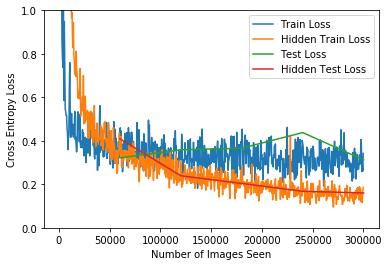

Final Test Cross Entropy Loss: 2.8776463004434185. Final Test accuracy: 0.0686
Final Test Cross Entropy Normy Loss: 0.16014182227545057. Final Test Normy accuracy: 0.9494


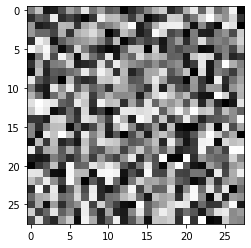

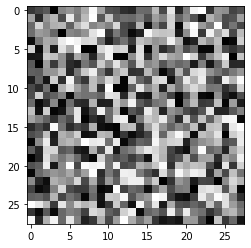

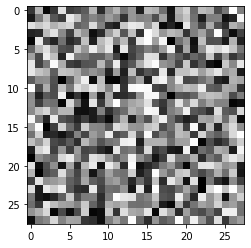

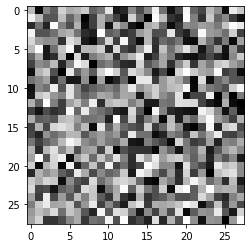

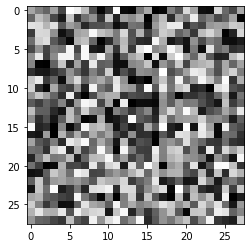

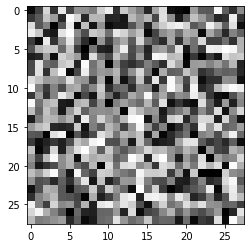

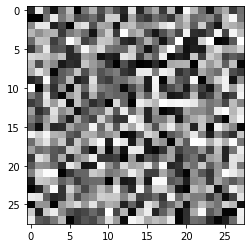

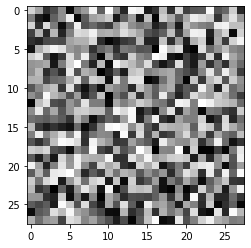

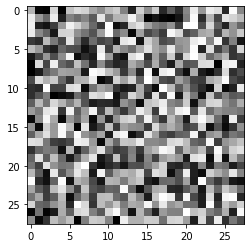

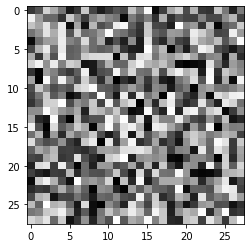

In [103]:

# Plot loss
utils.plot_loss(train_loss_dict, label="Train Loss")
utils.plot_loss(train_loss_dict_normy, label="Hidden Train Loss")
utils.plot_loss(val_loss_dict, label="Test Loss")
utils.plot_loss(val_loss_dict_normy, label="Hidden Test Loss")
plt.ylim([0, 1])
plt.legend()
plt.xlabel("Number of Images Seen")
plt.ylabel("Cross Entropy Loss")
plt.savefig("training_loss.png")

plt.show()
torch.save(model.state_dict(), "saved_model.torch")

final_loss, final_acc = utils.compute_loss_and_accuracy(
    dataloader_val, 
    model, 
    loss_function
)
print(f"Final Test Cross Entropy Loss: {final_loss}. Final Test accuracy: {final_acc}")

final_loss_normy, final_acc_normy = utils.compute_loss_and_accuracy(
    dataloader_val_normy, 
    modelNormy, 
    loss_function)
print(f"Final Test Cross Entropy Normy Loss: {final_loss_normy}. Final Test Normy accuracy: {final_acc_normy}")


weight = next(model.classifier.children()).weight.data

for x in weight:
    plt.imshow(x.reshape(28,28), cmap="gray")
    plt.show()

